## Problem Statement
Recent Covid-19 Pandemic has raised alarms over one of the most overlooked area to focus: Healthcare Management. 

While healthcare management has various use cases for using data science, patient length of stay is one critical parameter to observe and predict if one wants to improve the efficiency of the healthcare management in a hospital.

This parameter helps hospitals to identify patients of high LOS risk (patients who will stay longer) at the time of admission. Once identified, patients with high LOS risk can have their treatment plan optimized to miminize LOS and lower the chance of staff/visitor infection. Also, prior knowledge of LOS can aid in logistics such as room and bed allocation planning.

Suppose you have been hired as a Data Scientist to manage the functioning of Hospitals in a professional and optimal manner.

The task is to accurately predict the Length of Stay for each patient on case by case basis so that the Hospitals can use this information for optimal resource allocation and better functioning. The length of stay is divided into 11 different classes ranging from 0-10 days to more than 100 days.

### Data Description
traindata.csv – File containing features related to patient, hospital and Length of stay on case basis.

traindata_dictonary.csv – File containing the information of the features in train file

testdata.csv – File containing features related to patient, hospital. Need to predict the Length of stay for each case id.

### Variable information

In [1]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import sklearn
import seaborn as sns

In [2]:
# Loading data
train_d=pd.read_csv("train_data.csv")
#train_d=pd.read_csv("C:/Users/RAJKUMAR/Downloads/data/train_data.csv")
train_d.shape
train_d.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


## Encoding the target variable "Stay"

In [3]:
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
train_d["Stay"] = lb.fit_transform(train_d.Stay)
train_d["Stay"]

0         0
1         4
2         3
3         4
4         4
         ..
318433    1
318434    3
318435    1
318436    1
318437    0
Name: Stay, Length: 318438, dtype: int32

In [4]:
train_d["Stay"]= np.where((train_d["Stay"]<1) , 1, 0)

In [5]:
## We split our original train_d into train_data and test_data

In [6]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(train_d, test_size=0.15, random_state=25,stratify=train_d['Stay'])

In [7]:
#xy_train=train_data

## Pandas Profiling report

In [8]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(train_data)
#profile

In [9]:
train_data=train_data.dropna()

In [10]:
train_data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
159421,159422,13,a,5,Z,2,anesthesia,R,F,4.0,64466,8.0,Trauma,Moderate,2,71-80,5130.0,0
286720,286721,26,b,2,Y,3,gynecology,R,D,2.0,19110,15.0,Emergency,Moderate,3,41-50,4679.0,0
305381,305382,29,a,4,X,2,gynecology,S,F,4.0,101531,2.0,Urgent,Extreme,2,41-50,5843.0,0
90071,90072,6,a,6,X,3,TB & Chest disease,R,F,2.0,85470,1.0,Emergency,Extreme,2,41-50,3645.0,0
232865,232866,21,c,3,Z,3,gynecology,S,A,2.0,45229,8.0,Emergency,Moderate,3,51-60,4524.0,0


In [11]:
train_data.isna().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [12]:
#train_data.to_csv('Development_data.csv')
#test_data.to_csv('Validation_data.csv')

In [13]:
map_age={'0-10':0, '11-20':1, '21-30':2, '31-40':3, '41-50':4, '51-60':5, '61-70':6, '71-80':7, '81-90':8, '91-100':9}
train_data["Age"]=train_data["Age"].map(map_age)
train_data["Age"].value_counts()

3    53286
4    53179
5    40563
2    34319
7    30078
6    28363
1    14029
8     6593
0     5261
9     1050
Name: Age, dtype: int64

In [14]:
map_illness={"Minor":0, "Moderate":1, "Extreme":2}
train_data["Severity of Illness"]=train_data["Severity of Illness"].map(map_illness)
train_data["Severity of Illness"].value_counts()

1    147543
0     71495
2     47683
Name: Severity of Illness, dtype: int64

In [15]:
feature1=list(train_data.columns)

In [16]:
nominal_features = ['Hospital_type_code','Hospital_region_code','Department','Ward_Type','Ward_Facility_Code','Type of Admission']
ordinal_features = ['Severity of Illness','Age','Stay']


In [17]:
def one_hot_encode(dataset,features):
    nominal_df = dataset[features]

    # convert into dummies
    nominal_dummies = pd.get_dummies(nominal_df, drop_first=False)
    # drop categorical variables 
    dataset = dataset.drop(list(nominal_df.columns), axis=1)
    # concat dummy variables with X
    dataset = pd.concat([dataset, nominal_dummies], axis=1)
    return dataset

de_1_df = one_hot_encode(train_data,nominal_features)
de_1_df.head()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Severity of Illness,Visitors with Patient,Age,...,Ward_Type_U,Ward_Facility_Code_A,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,Type of Admission_Emergency,Type of Admission_Trauma,Type of Admission_Urgent
159421,159422,13,5,2,4.0,64466,8.0,1,2,7,...,0,0,0,0,0,0,1,0,1,0
286720,286721,26,2,3,2.0,19110,15.0,1,3,4,...,0,0,0,0,1,0,0,1,0,0
305381,305382,29,4,2,4.0,101531,2.0,2,2,4,...,0,0,0,0,0,0,1,0,0,1
90071,90072,6,6,3,2.0,85470,1.0,2,2,4,...,0,0,0,0,0,0,1,1,0,0
232865,232866,21,3,3,2.0,45229,8.0,1,3,5,...,0,1,0,0,0,0,0,1,0,0


In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266721 entries, 159421 to 114204
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            266721 non-null  int64  
 1   Hospital_code                      266721 non-null  int64  
 2   Hospital_type_code                 266721 non-null  object 
 3   City_Code_Hospital                 266721 non-null  int64  
 4   Hospital_region_code               266721 non-null  object 
 5   Available Extra Rooms in Hospital  266721 non-null  int64  
 6   Department                         266721 non-null  object 
 7   Ward_Type                          266721 non-null  object 
 8   Ward_Facility_Code                 266721 non-null  object 
 9   Bed Grade                          266721 non-null  float64
 10  patientid                          266721 non-null  int64  
 11  City_Code_Patient                 

## Out of 17 variables, we have  13 categorical variables

(array([246961.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  19760.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

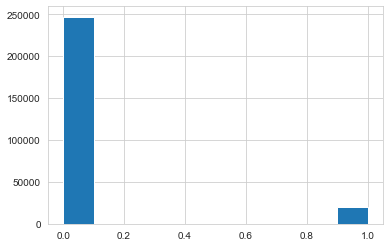

In [19]:
sns.set_style("whitegrid")
plt.hist(train_data.Stay)

In [20]:
# Variables
cat=['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
        'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay']
print(len(cat))
train_data[cat].head()

16


,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
159421,13,a,5,Z,2,anesthesia,R,F,4.0,8.0,Trauma,1,2,7,5130.0,0
286720,26,b,2,Y,3,gynecology,R,D,2.0,15.0,Emergency,1,3,4,4679.0,0
305381,29,a,4,X,2,gynecology,S,F,4.0,2.0,Urgent,2,2,4,5843.0,0
90071,6,a,6,X,3,TB & Chest disease,R,F,2.0,1.0,Emergency,2,2,4,3645.0,0
232865,21,c,3,Z,3,gynecology,S,A,2.0,8.0,Emergency,1,3,5,4524.0,0


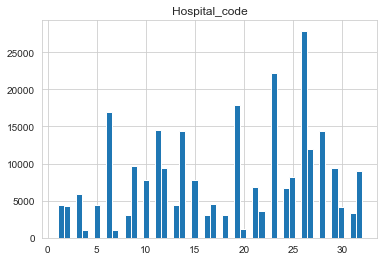

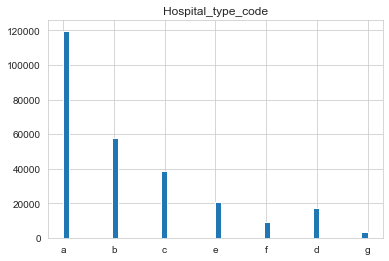

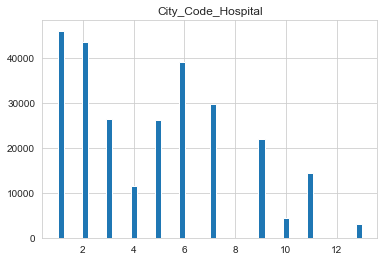

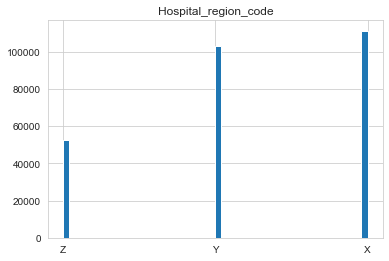

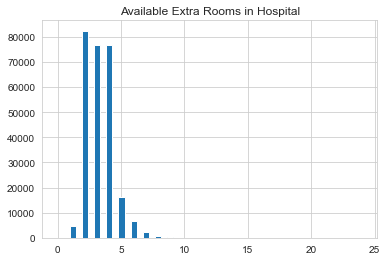

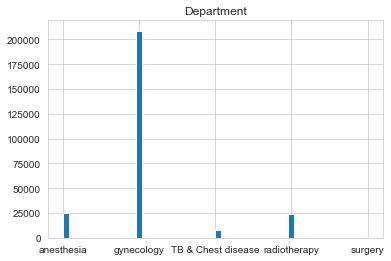

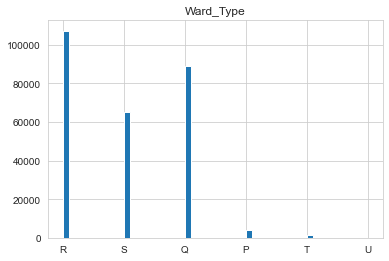

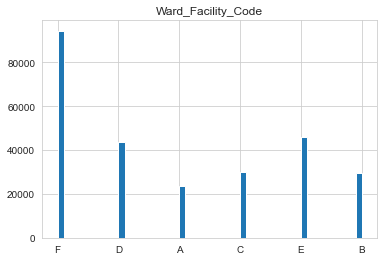

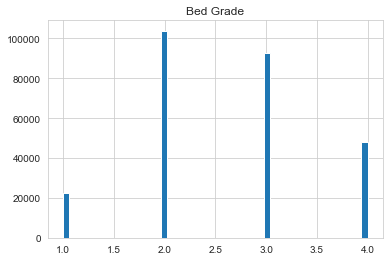

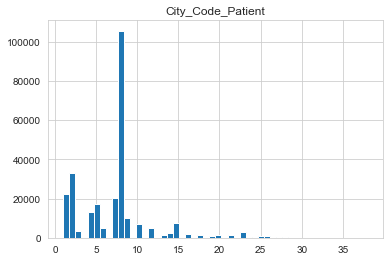

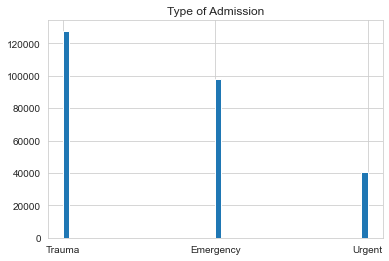

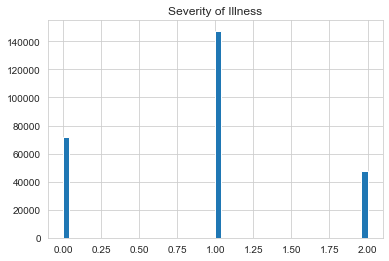

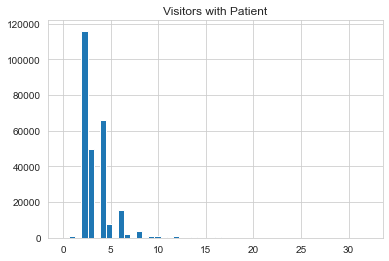

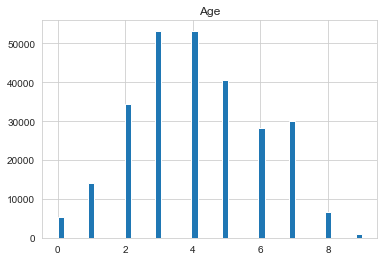

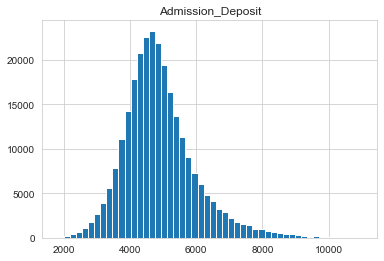

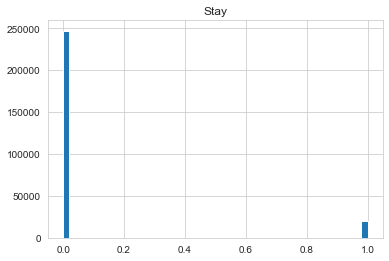

In [21]:
for col in cat:
    plt.title(col)
    train_data[col].hist(bins = 50)
    plt.show()

# 1. Hospital_code

<AxesSubplot:xlabel='Hospital_code', ylabel='count'>

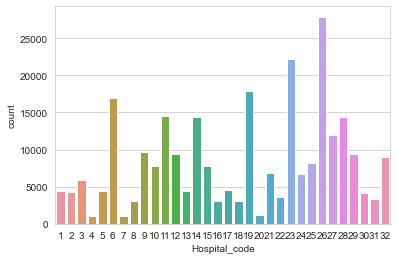

In [22]:
sns.countplot(data=train_data, x="Hospital_code")

### The no. of hospitals with code 26 is the maximum

In [23]:
train_data["hosp_26"]=np.where((train_data["Hospital_code"]==26),1,0)
train_data["hosp_26"].value_counts()

0    238814
1     27907
Name: hosp_26, dtype: int64

<AxesSubplot:xlabel='Hospital_code', ylabel='Stay'>

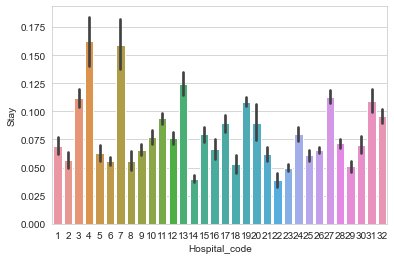

In [24]:
sns.barplot(x= "Hospital_code",y= "Stay", data = train_data)

# 2. Hospital_type_code

In [25]:
#df_hosp_type_a=train_data[train_data["Hospital_type_code"]=="a"]
train_data["hosptype_a"]=np.where((train_data["Hospital_type_code"]=="a"),1,0)
train_data["hosptype_a"].value_counts()

0    146921
1    119800
Name: hosptype_a, dtype: int64

# 3. City_Code_Hospital

<AxesSubplot:xlabel='City_Code_Hospital', ylabel='count'>

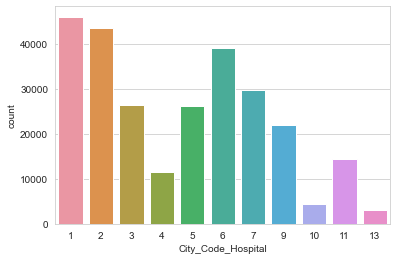

In [26]:
sns.countplot(data = train_data , x = 'City_Code_Hospital')

### Hospitals with city code 1 has the most no. of patients admitted and is followed by hospitals with city codes 2 and 6.

In [27]:
train_data["cityhosp126"]=np.where(((train_data["City_Code_Hospital"]==1)|(train_data["City_Code_Hospital"]==2)|(train_data["City_Code_Hospital"]==6)),1,0)
train_data["cityhosp126"].value_counts()

0    137936
1    128785
Name: cityhosp126, dtype: int64

<AxesSubplot:xlabel='City_Code_Hospital', ylabel='Stay'>

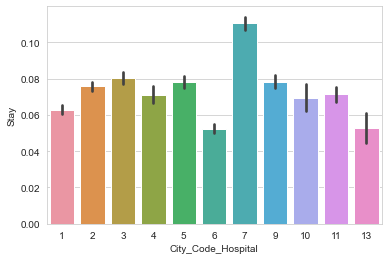

In [28]:
sns.barplot(x= "City_Code_Hospital",y= "Stay", data = train_data)

In [29]:
train_data["cityhosp7"]=np.where((train_data["City_Code_Hospital"]==7),1,0)

<AxesSubplot:xlabel='Hospital_type_code', ylabel='count'>

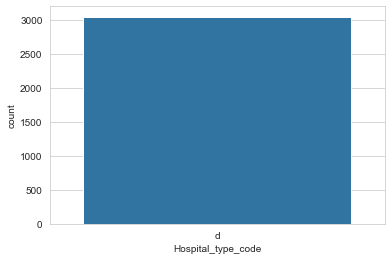

In [30]:
df_city=train_data[train_data["City_Code_Hospital"]==13]
#df_city["Hospital_type_code"]
sns.countplot(data=df_city, x='Hospital_type_code')

In [31]:
train_data["cityhosp159"]=(train_data["City_Code_Hospital"]==1)|(train_data["City_Code_Hospital"]==5)|(train_data["City_Code_Hospital"]==9)

# 4. Hospital_region_code

<AxesSubplot:xlabel='Hospital_region_code', ylabel='count'>

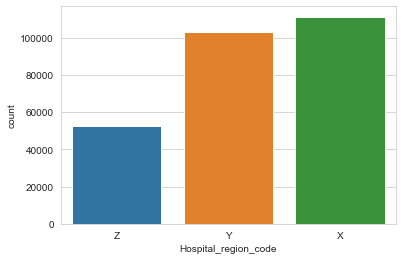

In [32]:
sns.countplot(data=train_data, x="Hospital_region_code")

In [33]:
train_data["hosregX"]=(train_data["Hospital_region_code"]=="X")
train_data["hosregY"]=(train_data["Hospital_region_code"]=="Y")
train_data["hosregZ"]=(train_data["Hospital_region_code"]=="Z")

# 5. Available Extra Rooms in Hospital

<AxesSubplot:xlabel='Available Extra Rooms in Hospital', ylabel='count'>

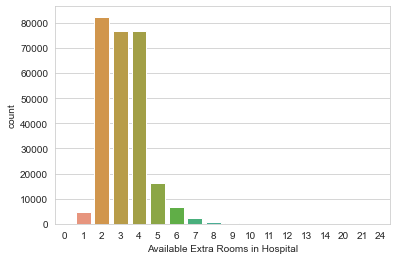

In [34]:
sns.countplot(data = train_data , x = 'Available Extra Rooms in Hospital')

### Most of the hospitals have available extra rooms between 2, 3 and 4.
### For type "a", maximum no. of hospitals has available extra rooms 4 followed by 3 and 2.

In [35]:
train_data["rooms234"]=((train_data["Available Extra Rooms in Hospital"]==2) | (train_data["Available Extra Rooms in Hospital"]==3)|(train_data["Available Extra Rooms in Hospital"]==4))

<AxesSubplot:xlabel='Available Extra Rooms in Hospital', ylabel='Stay'>

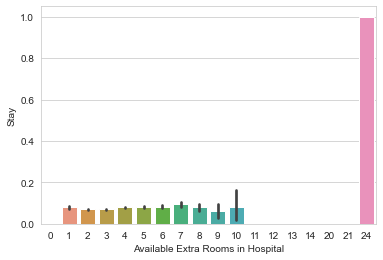

In [36]:
sns.barplot(x= "Available Extra Rooms in Hospital",y= "Stay", data = train_data)

# 6. Department

<AxesSubplot:xlabel='Department', ylabel='count'>

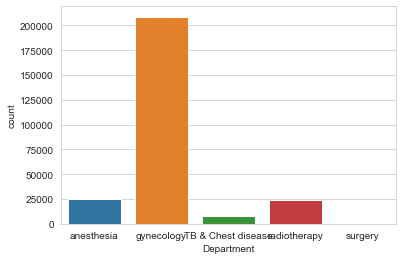

In [37]:
sns.countplot(data=train_data, x="Department")

In [38]:
train_data["deptg"]=(train_data["Department"]=="gynecology")

## 7. Ward_Type

R    107310
Q     88777
S     65197
P      4186
T      1242
U         9
Name: Ward_Type, dtype: int64

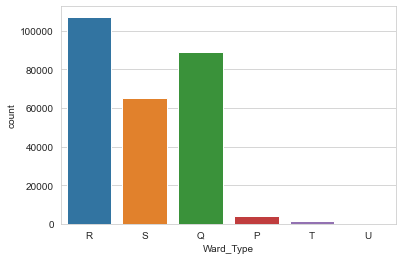

In [39]:
sns.countplot(data=train_data, x="Ward_Type")
train_data["Ward_Type"].value_counts()

In [40]:
train_data["wardtype_RQS"]=((train_data["Ward_Type"]=="R")|(train_data["Ward_Type"]=="Q")|(train_data["Ward_Type"]=="S"))

## 8. Ward_Facility_Code


<AxesSubplot:xlabel='Ward_Facility_Code', ylabel='count'>

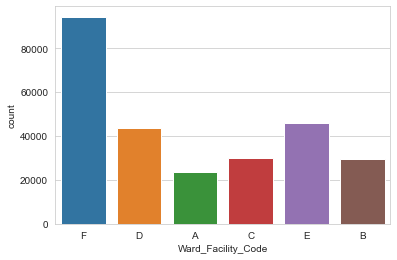

In [41]:
sns.countplot(data=train_data, x="Ward_Facility_Code")

In [42]:
train_data["wardfacilityF"]=(train_data["Ward_Facility_Code"]=="F")

## 9. Bed Grade


<AxesSubplot:xlabel='Bed Grade', ylabel='count'>

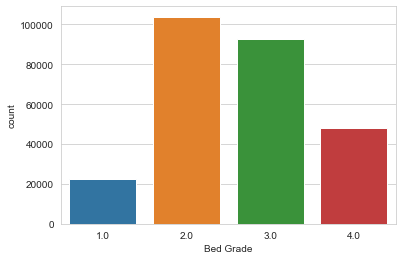

In [43]:
sns.countplot(data=train_data,x="Bed Grade")

In [44]:
train_data["bed2_3"]=((train_data["Bed Grade"]==2) | (train_data["Bed Grade"]==3))

## 10. patientid

# 11. City_Code_Patient

<AxesSubplot:xlabel='City_Code_Patient', ylabel='count'>

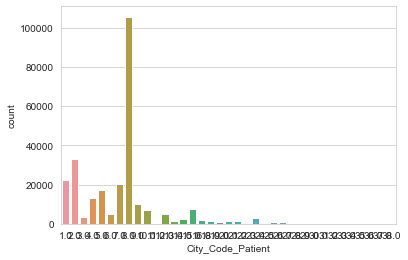

In [45]:
sns.countplot(data=train_data, x="City_Code_Patient")

In [46]:
train_data["citypatient8"]=(train_data["City_Code_Patient"]==8)

In [47]:
train_data["citypatient12"]=(train_data["City_Code_Patient"]==12)

### Majority of the patients came from city 8

# 12. Type of Admission

<AxesSubplot:xlabel='Type of Admission', ylabel='count'>

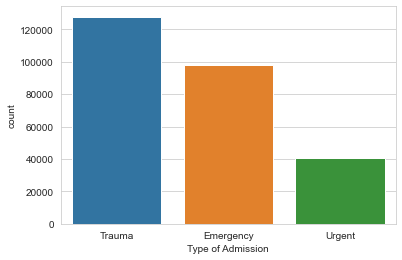

In [48]:
sns.countplot(data=train_data, x="Type of Admission")

In [49]:
train_data["trauma"]=(train_data["Type of Admission"]=="Trauma")

<AxesSubplot:xlabel='Type of Admission', ylabel='Stay'>

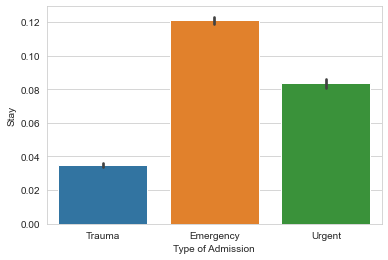

In [50]:
sns.barplot(data=train_data, x="Type of Admission", y="Stay")

# 13. Severity of Illness

<AxesSubplot:xlabel='Severity of Illness', ylabel='count'>

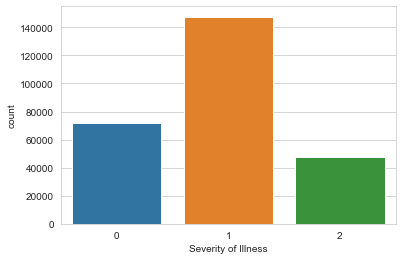

In [51]:
sns.countplot(data=train_data, x="Severity of Illness")

In [52]:
train_data["illness_mod"]=(train_data["Severity of Illness"]=="Moderate")
train_data["illness_ext"]=(train_data["Severity of Illness"]=="Extreme")
train_data["illness_min"]=(train_data["Severity of Illness"]=="Minor")

<AxesSubplot:xlabel='Severity of Illness', ylabel='Stay'>

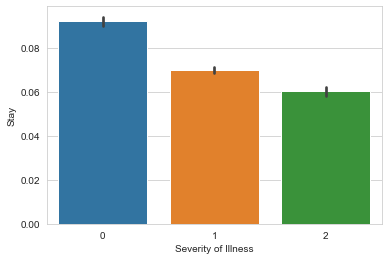

In [53]:
sns.barplot(x="Severity of Illness", y="Stay", data=train_data)

# 14. Visitors with Patient

<AxesSubplot:xlabel='Visitors with Patient', ylabel='count'>

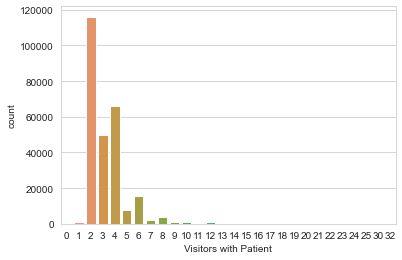

In [54]:
sns.countplot(data=train_data, x="Visitors with Patient")

In [55]:
train_data["visitors2"]=(train_data["Visitors with Patient"]==2)
train_data["visitors3_4"]=((train_data["Visitors with Patient"]==3) |(train_data["Visitors with Patient"]==4))

# 15. Age

<AxesSubplot:xlabel='Age', ylabel='count'>

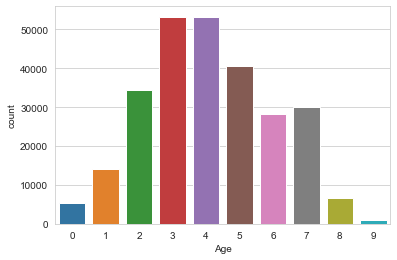

In [56]:
sns.countplot(x="Age", data=train_data)

# 16. Admission_Deposit

In [57]:
mu=np.mean(train_data["Admission_Deposit"])
sig=np.std(train_data["Admission_Deposit"])
median=np.median(train_data["Admission_Deposit"])

<AxesSubplot:xlabel='Admission_Deposit', ylabel='Count'>

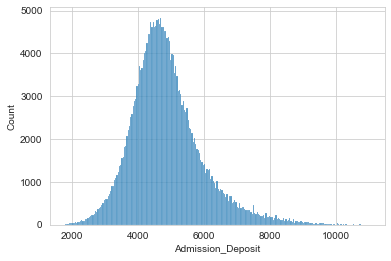

In [58]:
sns.histplot(x="Admission_Deposit", data=train_data)

In [59]:
train_data["mu_3sig"]=((train_data["Admission_Deposit"]<(mu-3*sig)) | (train_data["Admission_Deposit"]>(mu+3*sig)))

# 1. Hospital_code vs others

<AxesSubplot:xlabel='Hospital_code', ylabel='Available Extra Rooms in Hospital'>

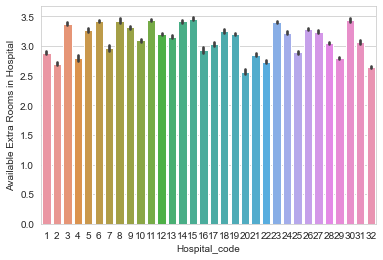

In [60]:
#vs. Avalilable extra rooms
sns.barplot(x = "Hospital_code", y = "Available Extra Rooms in Hospital", data = train_data)

In [61]:
train_data["hosp_code23_26rooms"]=(train_data["Hospital_code"]==26) | (train_data["Hospital_code"]==23) & ((train_data["Available Extra Rooms in Hospital"]==2) | (train_data["Available Extra Rooms in Hospital"]==3) | (train_data["Available Extra Rooms in Hospital"]==4))
train_data["hosp6_11_14_19_27_28rooms234"]=((train_data["Hospital_code"]==6) | (train_data["Hospital_code"]==11) | (train_data["Hospital_code"]==14)| (train_data["Hospital_code"]==19) | (train_data["Hospital_code"]==27) | (train_data["Hospital_code"]==28)) & ((train_data["Available Extra Rooms in Hospital"]==2) | (train_data["Available Extra Rooms in Hospital"]==3) | (train_data["Available Extra Rooms in Hospital"]==4))


# 2. Hospital_type_code vs others

<AxesSubplot:xlabel='Hospital_type_code', ylabel='count'>

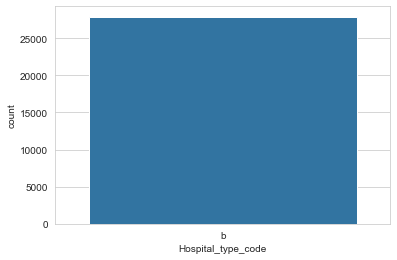

In [62]:
df=train_data[train_data["Hospital_code"]==26]
sns.countplot(x="Hospital_type_code", data=df)

## 2_4 Hosp type code & Hosp region


a    76144
e    20597
b    14427
Name: Hospital_type_code, dtype: int64

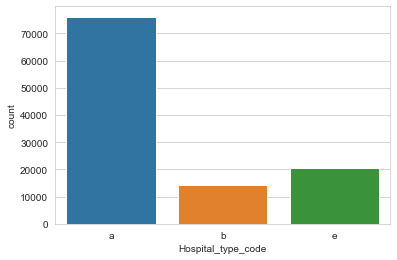

In [63]:
# vs. hospital region code
df=train_data[train_data["Hospital_region_code"]=="X"]
sns.countplot(x="Hospital_type_code", data=df)
df["Hospital_type_code"].value_counts()

In [64]:
train_data["region_Xtype_a"]=(train_data["Hospital_region_code"]=="X") & (train_data["Hospital_type_code"]=="a")
train_data["region_Ytype_a_or_b"]=(train_data["Hospital_region_code"]=="Y") & ((train_data["Hospital_type_code"]=="a") | (train_data["Hospital_type_code"]=="b"))


c    38580
d     9722
a     4359
Name: Hospital_type_code, dtype: int64

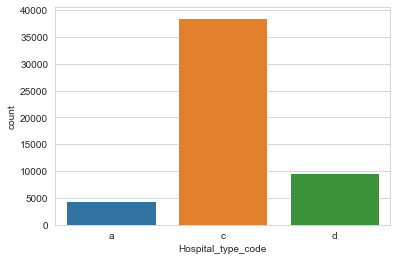

In [65]:
df2=train_data[train_data["Hospital_region_code"]=="Z"]
sns.countplot(x="Hospital_type_code", data=df2)
df2["Hospital_type_code"].value_counts()

In [66]:
train_data["region_Ztype_c"]=(train_data["Hospital_region_code"]=="Z") & (train_data["Hospital_type_code"]=="c")


## 2_9 Hosp type code & Bed Grade

<AxesSubplot:xlabel='Bed Grade', ylabel='count'>

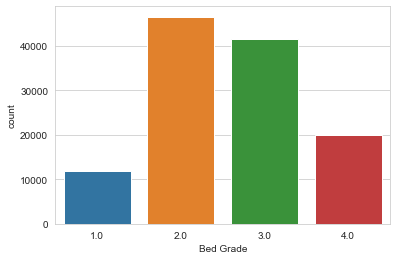

In [67]:
df=train_data[train_data["Hospital_type_code"]=="a"]
sns.countplot(x="Bed Grade", data=df)

In [68]:
train_data["hosptype_a_bed2_3"]=(train_data["Hospital_type_code"]=="a") & ((train_data["Bed Grade"]==2)|(train_data["Bed Grade"]==3))


## 2_8 Hospital type code & Ward facility


<AxesSubplot:xlabel='Ward_Facility_Code', ylabel='count'>

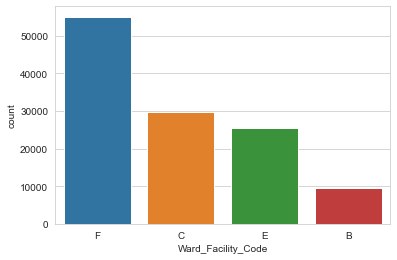

In [69]:
#Ward facility in hosp type code a
df=train_data[train_data["Hospital_type_code"]=="a"]
sns.countplot(x="Ward_Facility_Code", data=df)

### Ward facility code F is the most frequent for hosp type code a

In [70]:
train_data["wardfacil_F_hosptype_a"]=(train_data["Hospital_type_code"]=="a")&(train_data["Ward_Facility_Code"]=="F")


<AxesSubplot:xlabel='Ward_Facility_Code', ylabel='count'>

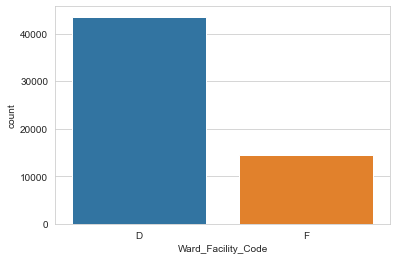

In [71]:
#Ward facility in hosp type code b
df=train_data[train_data["Hospital_type_code"]=="b"]
sns.countplot(x="Ward_Facility_Code", data=df)

In [72]:
train_data["wardfacil_A_hosptype_c"]=(train_data["Hospital_type_code"]=="c")&(train_data["Ward_Facility_Code"]=="D")


<AxesSubplot:xlabel='Ward_Facility_Code', ylabel='count'>

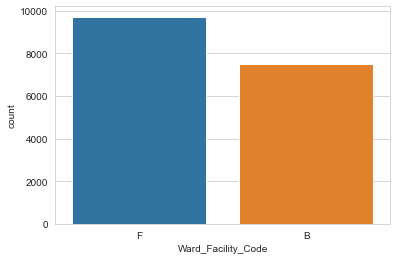

In [73]:
#Ward facility in hosp type code d
df=train_data[train_data["Hospital_type_code"]=="d"]
sns.countplot(x="Ward_Facility_Code", data=df)

In [74]:
train_data["wardfacil_BF_hosptype_d"]=(train_data["Hospital_type_code"]=="d")&((train_data["Ward_Facility_Code"]=="F")|(train_data["Ward_Facility_Code"]=="B"))


<AxesSubplot:xlabel='Ward_Facility_Code', ylabel='count'>

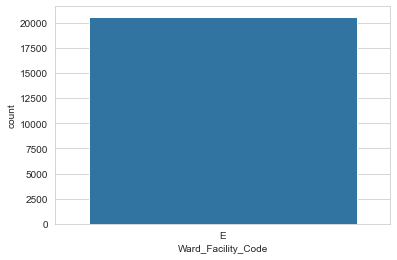

In [75]:
#Ward facility in hosp type code e
df=train_data[train_data["Hospital_type_code"]=="e"]
sns.countplot(x="Ward_Facility_Code", data=df)

In [76]:
train_data["wardfacil_B_hosptype_f"]=(train_data["Hospital_type_code"]=="f")&(train_data["Ward_Facility_Code"]=="B")
train_data["wardfacil_B_hosptype_g"]=(train_data["Hospital_type_code"]=="g")&(train_data["Ward_Facility_Code"]=="B")


## 2_12 Hosp type code & Type of Admission


<AxesSubplot:xlabel='Type of Admission', ylabel='count'>

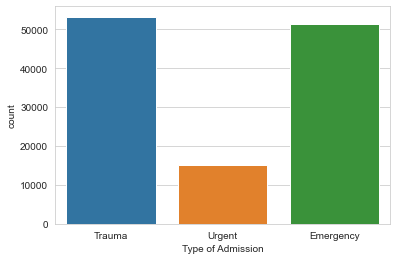

In [77]:
df=train_data[train_data["Hospital_type_code"]=="a"]
sns.countplot(data=df, x="Type of Admission")

In [78]:
train_data["Trauma_emerg_hosptype_a"]=(train_data["Hospital_type_code"]=="a")&((train_data["Type of Admission"]=="Trauma")|(train_data["Type of Admission"]=="Emergency"))


### We see that all hosp type codes admitted patients with trauma mostly.

## 2_13 Hosp type code & Severity of illness

<AxesSubplot:xlabel='Severity of Illness', ylabel='count'>

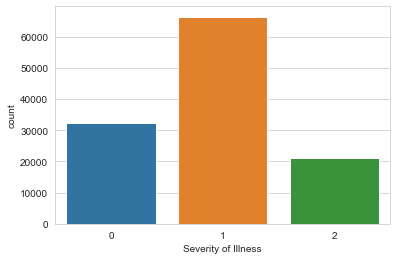

In [79]:
df=train_data[train_data["Hospital_type_code"]=="a"]
sns.countplot(data=df, x="Severity of Illness")

In [80]:
train_data["modill_hosptype_a"]=(train_data["Hospital_type_code"]=="a")&(train_data["Severity of Illness"]=="Moderate")

# 3. City_Code_Hospital vs others


## 3_1 City code hosp & hosp code

## 3_2 City code hosp & Hosp type code

<AxesSubplot:xlabel='City_Code_Hospital', ylabel='count'>

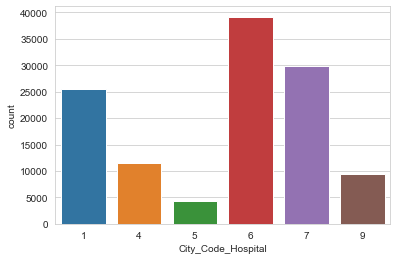

In [81]:
df=train_data[train_data["Hospital_type_code"]=="a"]
sns.countplot(data=df, x="City_Code_Hospital")

## 3_11 City Code hosp with City Code Patient

<AxesSubplot:xlabel='City_Code_Hospital', ylabel='City_Code_Patient'>

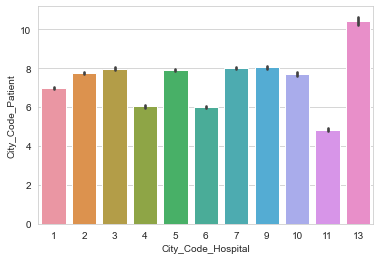

In [82]:
# vs. City_Code_Patient
sns.barplot(x = "City_Code_Hospital", y = "City_Code_Patient", data = train_data)

## 3_6 City code hosp & Department


In [83]:
#vs. Department
df_deptr=train_data[train_data["Department"]=="radiotherapy"]
df_depta=train_data[train_data["Department"]=="anesthesia"]
df_deptg=train_data[train_data["Department"]=="gynecology"]
df_deptT=train_data[train_data["Department"]=="TB & Chest disease"]
df_depts=train_data[train_data["Department"]=="surgery"]

<AxesSubplot:xlabel='City_Code_Hospital', ylabel='count'>

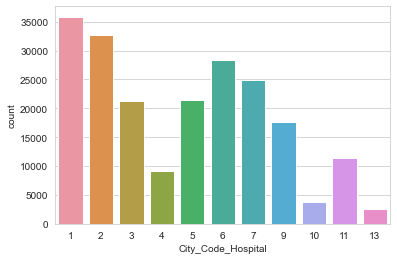

In [84]:
sns.countplot(data=df_deptg, x="City_Code_Hospital") #gynecology department

In [85]:
train_data["citycode1_2_6detpg"]=((train_data["City_Code_Hospital"]==1) | (train_data["City_Code_Hospital"]==2) | (train_data["City_Code_Hospital"]==6)) & (train_data["Department"]=="gynecology")

## 3_5 City code hosp & Available rooms


<AxesSubplot:xlabel='Available Extra Rooms in Hospital', ylabel='count'>

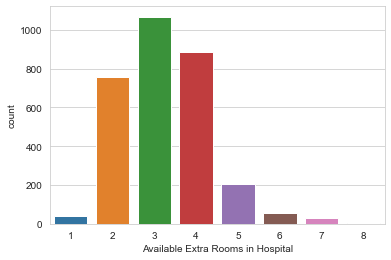

In [86]:
#vs. Available extra rooms
df=train_data[train_data["City_Code_Hospital"]==13]
sns.countplot(x="Available Extra Rooms in Hospital", data=df)

## 3_7 City hosp & Ward type


<AxesSubplot:xlabel='City_Code_Hospital', ylabel='count'>

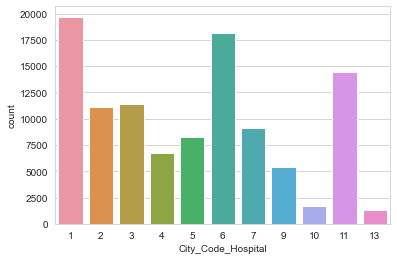

In [87]:
df=train_data[train_data["Ward_Type"]=="R"]
sns.countplot(x="City_Code_Hospital", data=df)

In [88]:
train_data["wardtype_R_cityhosp1_6_11"]=(train_data["Ward_Type"]=="R")&((train_data["City_Code_Hospital"]==1)|(train_data["City_Code_Hospital"]==6)|(train_data["City_Code_Hospital"]==11))

## 3_8 City hosp & Ward facility

<AxesSubplot:xlabel='Ward_Facility_Code', ylabel='count'>

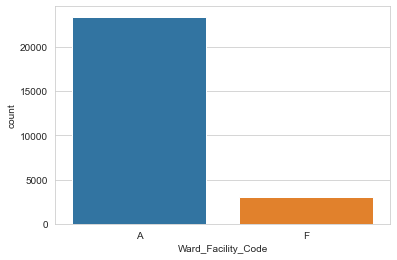

In [89]:
df=train_data[train_data["City_Code_Hospital"]==3]
sns.countplot(x="Ward_Facility_Code", data=df)

In [90]:
train_data["cityhosp3_facil_A"]=(train_data["City_Code_Hospital"]==3) & (train_data["Ward_Facility_Code"]=="A")


## 3_9 City hosp & Bed Grade

<AxesSubplot:xlabel='Bed Grade', ylabel='count'>

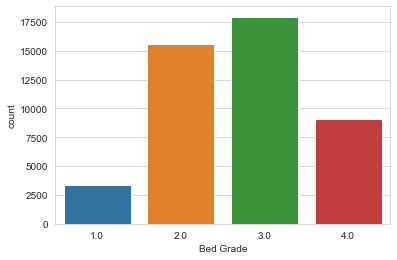

In [91]:
df=train_data[train_data["City_Code_Hospital"]==1]
sns.countplot(x="Bed Grade", data=df)

# 4. Hospital_region_code vs others

## 4_3 Hosp region & City hosp


<AxesSubplot:xlabel='City_Code_Hospital', ylabel='count'>

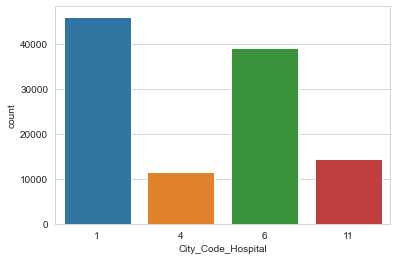

In [92]:
df=train_data[train_data["Hospital_region_code"]=="X"]
sns.countplot(x="City_Code_Hospital", data=df)

In [93]:
train_data["regionXcityhosp1_6"]=(train_data["Hospital_region_code"]=="X") & ((train_data["City_Code_Hospital"]==1)|(train_data["City_Code_Hospital"]==6))

## 4_6 Hospital region & Department="gyne"


In [94]:
train_data["region_X_gyne"]=(train_data["Hospital_region_code"]=="X") & (train_data["Department"]=="gynecology")


## 4_7 Hospital region & Ward type

<AxesSubplot:xlabel='Ward_Type', ylabel='count'>

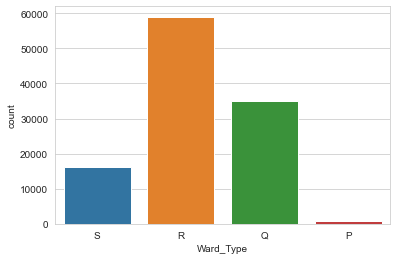

In [95]:
df=train_data[train_data["Hospital_region_code"]=="X"]
sns.countplot(x="Ward_Type", data=df) 

In [96]:
train_data["regionXwardtype_R"]=(train_data["Hospital_region_code"]=="X")&(train_data["Ward_Type"]=="R")


## 4_8 Hosp region & Ward facility

In [97]:
train_data["regionXfacil_F"]=(train_data["Hospital_region_code"]=="X")&(train_data["Ward_Facility_Code"]=="F")


## 4_9 Hosp region & Bed Grade


In [98]:
train_data["regionXbedgrade2_3"]=(train_data["Hospital_region_code"]=="X")&((train_data["Bed Grade"]==2)|(train_data["Bed Grade"]==3))


## 4_12 Hospital region & Type of Admission


In [99]:
train_data["regionXtrauma"]=(train_data["Hospital_region_code"]=="X")&(train_data["Type of Admission"]=="Trauma")
train_data["regionXmoderate"]=(train_data["Hospital_region_code"]=="X")&(train_data["Severity of Illness"]=="Moderate")


## 4_15 Hospital region & Age

# 5. Available extra rooms vs. others

## 6_5 Department & Available rooms


<AxesSubplot:xlabel='Available Extra Rooms in Hospital', ylabel='count'>

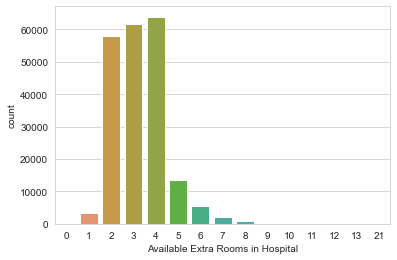

In [100]:
sns.countplot(data=df_deptg, x="Available Extra Rooms in Hospital") #gynecology department

In [101]:
train_data["rooms234_deptg"]=((train_data["Available Extra Rooms in Hospital"]==2)|(train_data["Available Extra Rooms in Hospital"]==3)|(train_data["Available Extra Rooms in Hospital"]==4)) & (train_data["Department"]=="gynecology")

## 6_14 Department & Visitors 


<AxesSubplot:xlabel='Department', ylabel='Visitors with Patient'>

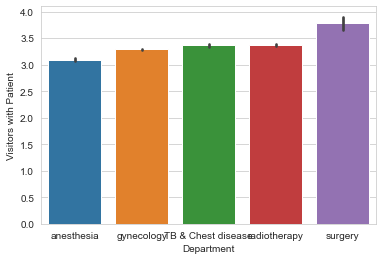

In [102]:
sns.barplot(x= "Department",y= "Visitors with Patient", data = train_data)

In [103]:
train_data["visitors2_gyne"]=(train_data["Visitors with Patient"]==2) & (train_data["Department"]=="gynecology") 


## 6_15 Department & Age


<AxesSubplot:xlabel='Age', ylabel='count'>

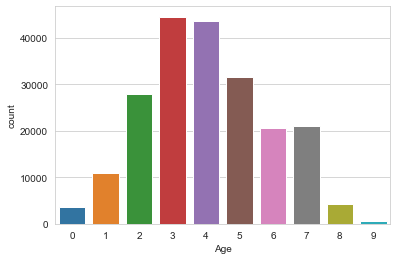

In [104]:
sns.countplot(data=df_deptg, x="Age") #gynecology department

In [105]:
train_data["age3_4_deptg"]=((train_data["Age"]==3) |(train_data["Age"]==4)) & (train_data["Department"]=="gynecology")

<AxesSubplot:xlabel='Age', ylabel='count'>

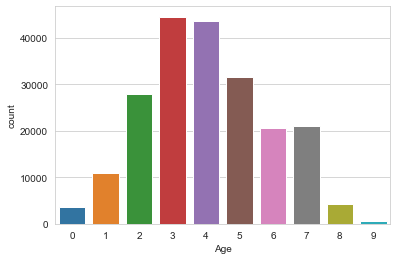

In [106]:
df_age0=train_data[train_data["Department"]=="gynecology"]
sns.countplot(x= "Age", data = df_age0)

In [107]:
train_data["region_Xtype_a_deptg"]=(train_data["Hospital_region_code"]=="X") & (train_data["Hospital_type_code"]=="a") & (train_data["Department"]=="gynecology")
train_data["region_Ytype_a_or_b_deptg"]=(train_data["Hospital_region_code"]=="Y") & ((train_data["Hospital_type_code"]=="a") | (train_data["Hospital_type_code"]=="b")) & (train_data["Department"]=="gynecology")


<AxesSubplot:xlabel='City_Code_Hospital', ylabel='count'>

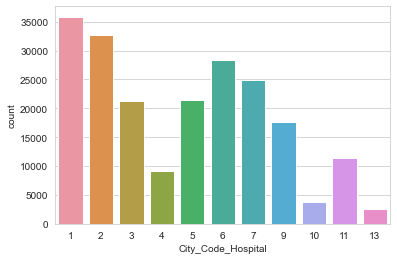

In [108]:
sns.countplot(data=df_deptg, x="City_Code_Hospital") #gynecology department

In [109]:
train_data["citycode1_2_6detpg"]=((train_data["City_Code_Hospital"]==1) | (train_data["City_Code_Hospital"]==2) | (train_data["City_Code_Hospital"]==6)) & (train_data["Department"]=="gynecology")


## 11_3 City_code_hosp for City_code_patient==8

<AxesSubplot:xlabel='City_Code_Hospital', ylabel='count'>

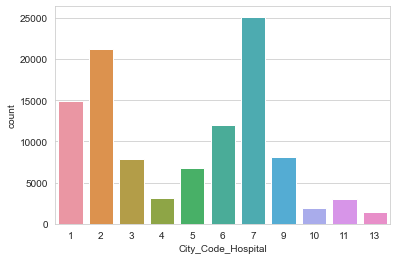

In [110]:
df=train_data[train_data["City_Code_Patient"]==8]
sns.countplot(data=df, x="City_Code_Hospital")

## We see that patients coming from city_code 8 mostly went to city_code_hosp 2 and 7

In [111]:
train_data["citycodehosp2_7_citypatient_8"]=((train_data["City_Code_Hospital"]==2) | (train_data["City_Code_Hospital"]==7)) & (train_data["City_Code_Patient"]==8)


# 11_3 City code hosp & City code patient==12

<AxesSubplot:xlabel='City_Code_Hospital', ylabel='count'>

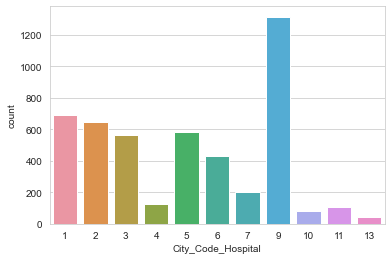

In [112]:
df=train_data[train_data["City_Code_Patient"]==12]
sns.countplot(data=df, x="City_Code_Hospital")

In [113]:
train_data["citycodehosp9_citypatient_12"]=(train_data["City_Code_Hospital"]==9) & (train_data["City_Code_Patient"]==12)


##  12_15 Type of admission and Age

In [114]:
df_tra=train_data[train_data["Type of Admission"]=="Trauma"]
df_emer=train_data[train_data["Type of Admission"]=="Emergency"]
df_urg=train_data[train_data["Type of Admission"]=="Urgent"]

<AxesSubplot:xlabel='Age', ylabel='count'>

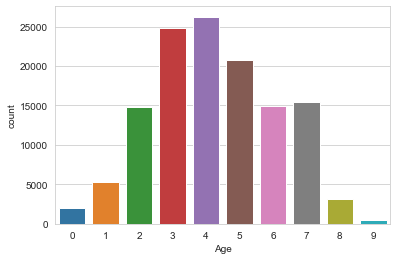

In [115]:
sns.countplot(data=df_tra, x="Age")

In [116]:
train_data["age345_trauma"]=((train_data["Age"]==3) | (train_data["Age"]==4) | (train_data["Age"]==5)) & (train_data["Type of Admission"]=="Trauma")


In [117]:
train_data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,...,regionXtrauma,regionXmoderate,rooms234_deptg,visitors2_gyne,age3_4_deptg,region_Xtype_a_deptg,region_Ytype_a_or_b_deptg,citycodehosp2_7_citypatient_8,citycodehosp9_citypatient_12,age345_trauma
159421,159422,13,a,5,Z,2,anesthesia,R,F,4.0,...,False,False,False,False,False,False,False,False,False,False
286720,286721,26,b,2,Y,3,gynecology,R,D,2.0,...,False,False,True,False,True,False,True,False,False,False
305381,305382,29,a,4,X,2,gynecology,S,F,4.0,...,False,False,True,True,True,True,False,False,False,False
90071,90072,6,a,6,X,3,TB & Chest disease,R,F,2.0,...,False,False,False,False,False,False,False,False,False,False
232865,232866,21,c,3,Z,3,gynecology,S,A,2.0,...,False,False,True,False,False,False,False,False,False,False


# Encoding the feature variables

In [118]:
features=train_data.drop(list(feature1),axis=1)
features.head()


,hosp_26,hosptype_a,cityhosp126,cityhosp7,cityhosp159,hosregX,hosregY,hosregZ,rooms234,deptg,...,regionXtrauma,regionXmoderate,rooms234_deptg,visitors2_gyne,age3_4_deptg,region_Xtype_a_deptg,region_Ytype_a_or_b_deptg,citycodehosp2_7_citypatient_8,citycodehosp9_citypatient_12,age345_trauma
159421,0,1,0,0,True,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
286720,1,0,1,0,False,False,True,False,True,True,...,False,False,True,False,True,False,True,False,False,False
305381,0,1,0,0,False,True,False,False,True,True,...,False,False,True,True,True,True,False,False,False,False
90071,0,1,1,0,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
232865,0,0,0,0,False,False,False,True,True,True,...,False,False,True,False,False,False,False,False,False,False


In [119]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

encoded_features=features.apply(le.fit_transform)
encoded_features.tail()

,hosp_26,hosptype_a,cityhosp126,cityhosp7,cityhosp159,hosregX,hosregY,hosregZ,rooms234,deptg,...,regionXtrauma,regionXmoderate,rooms234_deptg,visitors2_gyne,age3_4_deptg,region_Xtype_a_deptg,region_Ytype_a_or_b_deptg,citycodehosp2_7_citypatient_8,citycodehosp9_citypatient_12,age345_trauma
50828,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
151914,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
261400,1,0,1,0,0,0,1,0,1,1,...,0,0,1,0,0,0,1,0,0,0
114833,0,1,1,0,1,1,0,0,1,1,...,0,0,1,1,1,1,0,0,0,0
114204,0,1,1,0,0,1,0,0,0,1,...,1,0,0,0,1,1,0,0,0,1


## Adding de_1_df & encoded_features

In [120]:
combined_cols= [de_1_df, encoded_features]
train=pd.concat(combined_cols, axis=1)
train

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Severity of Illness,Visitors with Patient,Age,...,regionXtrauma,regionXmoderate,rooms234_deptg,visitors2_gyne,age3_4_deptg,region_Xtype_a_deptg,region_Ytype_a_or_b_deptg,citycodehosp2_7_citypatient_8,citycodehosp9_citypatient_12,age345_trauma
159421,159422,13,5,2,4.0,64466,8.0,1,2,7,...,0,0,0,0,0,0,0,0,0,0
286720,286721,26,2,3,2.0,19110,15.0,1,3,4,...,0,0,1,0,1,0,1,0,0,0
305381,305382,29,4,2,4.0,101531,2.0,2,2,4,...,0,0,1,1,1,1,0,0,0,0
90071,90072,6,6,3,2.0,85470,1.0,2,2,4,...,0,0,0,0,0,0,0,0,0,0
232865,232866,21,3,3,2.0,45229,8.0,1,3,5,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50828,50829,11,2,2,4.0,97610,8.0,2,4,5,...,0,0,0,0,0,0,0,1,0,0
151914,151915,32,9,1,1.0,129120,7.0,2,4,8,...,0,0,0,0,0,0,0,0,0,0
261400,261401,26,2,4,3.0,85261,7.0,0,4,2,...,0,0,1,0,0,0,1,0,0,0
114833,114834,24,1,4,2.0,44445,1.0,2,2,4,...,0,0,1,1,1,1,0,0,0,0


In [121]:
from sklearn.preprocessing import StandardScaler
train["Admission_Deposit"]=(train["Admission_Deposit"]-mu)/sig
train["Admission_Deposit"]
train

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Severity of Illness,Visitors with Patient,Age,...,regionXtrauma,regionXmoderate,rooms234_deptg,visitors2_gyne,age3_4_deptg,region_Xtype_a_deptg,region_Ytype_a_or_b_deptg,citycodehosp2_7_citypatient_8,citycodehosp9_citypatient_12,age345_trauma
159421,159422,13,5,2,4.0,64466,8.0,1,2,7,...,0,0,0,0,0,0,0,0,0,0
286720,286721,26,2,3,2.0,19110,15.0,1,3,4,...,0,0,1,0,1,0,1,0,0,0
305381,305382,29,4,2,4.0,101531,2.0,2,2,4,...,0,0,1,1,1,1,0,0,0,0
90071,90072,6,6,3,2.0,85470,1.0,2,2,4,...,0,0,0,0,0,0,0,0,0,0
232865,232866,21,3,3,2.0,45229,8.0,1,3,5,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50828,50829,11,2,2,4.0,97610,8.0,2,4,5,...,0,0,0,0,0,0,0,1,0,0
151914,151915,32,9,1,1.0,129120,7.0,2,4,8,...,0,0,0,0,0,0,0,0,0,0
261400,261401,26,2,4,3.0,85261,7.0,0,4,2,...,0,0,1,0,0,0,1,0,0,0
114833,114834,24,1,4,2.0,44445,1.0,2,2,4,...,0,0,1,1,1,1,0,0,0,0


In [122]:
from sklearn.model_selection import train_test_split
train_40, train_60=train_test_split(train, test_size=0.6, random_state=25, stratify=train['Stay'],)
train_40

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Severity of Illness,Visitors with Patient,Age,...,regionXtrauma,regionXmoderate,rooms234_deptg,visitors2_gyne,age3_4_deptg,region_Xtype_a_deptg,region_Ytype_a_or_b_deptg,citycodehosp2_7_citypatient_8,citycodehosp9_citypatient_12,age345_trauma
288172,288173,9,5,3,4.0,55018,4.0,0,2,3,...,0,0,1,1,1,0,0,0,0,0
174877,174878,26,2,2,2.0,38052,2.0,1,2,3,...,0,0,0,0,0,0,0,0,0,1
186791,186792,22,9,3,2.0,32391,4.0,0,2,3,...,0,0,1,1,1,0,0,0,0,0
127340,127341,27,7,4,3.0,93207,2.0,2,2,3,...,0,0,0,0,0,0,0,0,0,0
113661,113662,26,2,2,2.0,96618,13.0,2,2,7,...,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68940,68941,27,7,3,2.0,94296,8.0,1,4,7,...,0,0,1,0,0,0,1,1,0,0
183464,183465,11,2,4,3.0,9866,8.0,0,3,1,...,0,0,0,0,0,0,0,1,0,0
285309,285310,12,9,4,3.0,20749,7.0,0,4,7,...,0,0,1,0,0,0,1,0,0,0
241195,241196,6,6,2,4.0,76965,2.0,0,4,2,...,1,0,0,0,0,0,0,0,0,0


## Separating x_train and y_train from train_40

In [123]:
x_train=train_40.drop("Stay", axis=1)
y_train=train_40["Stay"]
y_train
x_train

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Severity of Illness,Visitors with Patient,Age,...,regionXtrauma,regionXmoderate,rooms234_deptg,visitors2_gyne,age3_4_deptg,region_Xtype_a_deptg,region_Ytype_a_or_b_deptg,citycodehosp2_7_citypatient_8,citycodehosp9_citypatient_12,age345_trauma
288172,288173,9,5,3,4.0,55018,4.0,0,2,3,...,0,0,1,1,1,0,0,0,0,0
174877,174878,26,2,2,2.0,38052,2.0,1,2,3,...,0,0,0,0,0,0,0,0,0,1
186791,186792,22,9,3,2.0,32391,4.0,0,2,3,...,0,0,1,1,1,0,0,0,0,0
127340,127341,27,7,4,3.0,93207,2.0,2,2,3,...,0,0,0,0,0,0,0,0,0,0
113661,113662,26,2,2,2.0,96618,13.0,2,2,7,...,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68940,68941,27,7,3,2.0,94296,8.0,1,4,7,...,0,0,1,0,0,0,1,1,0,0
183464,183465,11,2,4,3.0,9866,8.0,0,3,1,...,0,0,0,0,0,0,0,1,0,0
285309,285310,12,9,4,3.0,20749,7.0,0,4,7,...,0,0,1,0,0,0,1,0,0,0
241195,241196,6,6,2,4.0,76965,2.0,0,4,2,...,1,0,0,0,0,0,0,0,0,0


In [124]:
x_train=x_train.drop(["case_id","patientid"], axis=1)
x_train

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,City_Code_Patient,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Hospital_type_code_a,...,regionXtrauma,regionXmoderate,rooms234_deptg,visitors2_gyne,age3_4_deptg,region_Xtype_a_deptg,region_Ytype_a_or_b_deptg,citycodehosp2_7_citypatient_8,citycodehosp9_citypatient_12,age345_trauma
288172,9,5,3,4.0,4.0,0,2,3,0.542573,0,...,0,0,1,1,1,0,0,0,0,0
174877,26,2,2,2.0,2.0,1,2,3,1.780126,0,...,0,0,0,0,0,0,0,0,0,1
186791,22,9,3,2.0,4.0,0,2,3,-0.606650,0,...,0,0,1,1,1,0,0,0,0,0
127340,27,7,4,3.0,2.0,2,2,3,2.567744,1,...,0,0,0,0,0,0,0,0,0,0
113661,26,2,2,2.0,13.0,2,2,7,-0.485195,0,...,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68940,27,7,3,2.0,8.0,1,4,7,0.718314,1,...,0,0,1,0,0,0,1,1,0,0
183464,11,2,4,3.0,8.0,0,3,1,3.229306,0,...,0,0,0,0,0,0,0,1,0,0
285309,12,9,4,3.0,7.0,0,4,7,-0.061943,1,...,0,0,1,0,0,0,1,0,0,0
241195,6,6,2,4.0,2.0,0,4,2,0.006146,1,...,1,0,0,0,0,0,0,0,0,0


# Feature selection techniques

In [125]:
# random forest
(X,y)=(x_train,y_train)

# WOE

In [126]:
#validation=pd.read_csv("Validation_data.csv")
#validation=pd.read_csv("C:/Users/RAJKUMAR/Downloads/Validation_data.csv")
#devlopment=pd.read_csv("C:/Users/RAJKUMAR/Downloads/Development_data.csv")
devlopment=pd.read_csv("Development_data.csv")
import scorecardpy as sc

In [127]:
devlopment.head()

,Unnamed: 0,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,159421,159422,13,a,5,Z,2,anesthesia,R,F,4.0,64466,8.0,Trauma,Moderate,2,71-80,5130.0,0
1,286720,286721,26,b,2,Y,3,gynecology,R,D,2.0,19110,15.0,Emergency,Moderate,3,41-50,4679.0,0
2,305381,305382,29,a,4,X,2,gynecology,S,F,4.0,101531,2.0,Urgent,Extreme,2,41-50,5843.0,0
3,90071,90072,6,a,6,X,3,TB & Chest disease,R,F,2.0,85470,1.0,Emergency,Extreme,2,41-50,3645.0,0
4,232865,232866,21,c,3,Z,3,gynecology,S,A,2.0,45229,8.0,Emergency,Moderate,3,51-60,4524.0,0


In [128]:
devlopment=devlopment.drop(['Unnamed: 0','patientid'], axis=1)
devlopment.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,159422,13,a,5,Z,2,anesthesia,R,F,4.0,8.0,Trauma,Moderate,2,71-80,5130.0,0
1,286721,26,b,2,Y,3,gynecology,R,D,2.0,15.0,Emergency,Moderate,3,41-50,4679.0,0
2,305382,29,a,4,X,2,gynecology,S,F,4.0,2.0,Urgent,Extreme,2,41-50,5843.0,0
3,90072,6,a,6,X,3,TB & Chest disease,R,F,2.0,1.0,Emergency,Extreme,2,41-50,3645.0,0
4,232866,21,c,3,Z,3,gynecology,S,A,2.0,8.0,Emergency,Moderate,3,51-60,4524.0,0


In [129]:
devlopment

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,159422,13,a,5,Z,2,anesthesia,R,F,4.0,8.0,Trauma,Moderate,2,71-80,5130.0,0
1,286721,26,b,2,Y,3,gynecology,R,D,2.0,15.0,Emergency,Moderate,3,41-50,4679.0,0
2,305382,29,a,4,X,2,gynecology,S,F,4.0,2.0,Urgent,Extreme,2,41-50,5843.0,0
3,90072,6,a,6,X,3,TB & Chest disease,R,F,2.0,1.0,Emergency,Extreme,2,41-50,3645.0,0
4,232866,21,c,3,Z,3,gynecology,S,A,2.0,8.0,Emergency,Moderate,3,51-60,4524.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266716,50829,11,b,2,Y,2,anesthesia,Q,D,4.0,8.0,Emergency,Extreme,4,51-60,5427.0,0
266717,151915,32,f,9,Y,1,gynecology,S,B,1.0,7.0,Trauma,Extreme,4,81-90,3991.0,0
266718,261401,26,b,2,Y,4,gynecology,Q,D,3.0,7.0,Emergency,Minor,4,21-30,5295.0,1
266719,114834,24,a,1,X,4,gynecology,R,E,2.0,1.0,Urgent,Extreme,2,41-50,3999.0,0


In [130]:
# filter variable via missing rate, iv, identical value rate
train_filter = sc.var_filter(devlopment, y="Stay")

[INFO] filtering variables ...
Variable filtering on 266721 rows and 17 columns in 00:05:09 
7 variables are removed


In [131]:
print("Removed Features: {}".format(list(set(devlopment.columns) - set(train_filter.columns))))

Removed Features: ['Department', 'Available Extra Rooms in Hospital', 'Ward_Type', 'Hospital_type_code', 'Age', 'Bed Grade', 'case_id']


In [132]:
train_filter.head()

,City_Code_Patient,Hospital_region_code,Severity of Illness,Visitors with Patient,City_Code_Hospital,Ward_Facility_Code,Admission_Deposit,Hospital_code,Type of Admission,Stay
0,8.0,Z,Moderate,2,5,F,5130.0,13,Trauma,0
1,15.0,Y,Moderate,3,2,D,4679.0,26,Emergency,0
2,2.0,X,Extreme,2,4,F,5843.0,29,Urgent,0
3,1.0,X,Extreme,2,6,F,3645.0,6,Emergency,0
4,8.0,Z,Moderate,3,3,A,4524.0,21,Emergency,0


In [133]:
# woe binning ------
bins = sc.woebin(train_filter, y="Stay")

[INFO] creating woe binning ...
Binning on 266721 rows and 10 columns in 00:00:21


{'Visitors with Patient': <Figure size 432x288 with 2 Axes>,
 'City_Code_Patient': <Figure size 432x288 with 2 Axes>,
 'City_Code_Hospital': <Figure size 432x288 with 2 Axes>,
 'Ward_Facility_Code': <Figure size 432x288 with 2 Axes>,
 'Admission_Deposit': <Figure size 432x288 with 2 Axes>,
 'Hospital_region_code': <Figure size 432x288 with 2 Axes>,
 'Hospital_code': <Figure size 432x288 with 2 Axes>,
 'Severity of Illness': <Figure size 432x288 with 2 Axes>,
 'Type of Admission': <Figure size 432x288 with 2 Axes>}

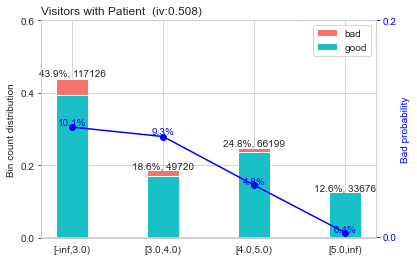

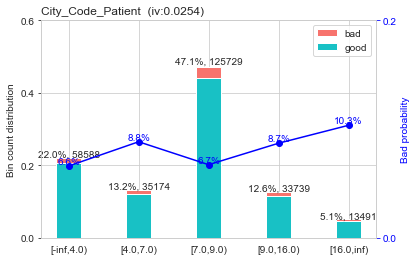

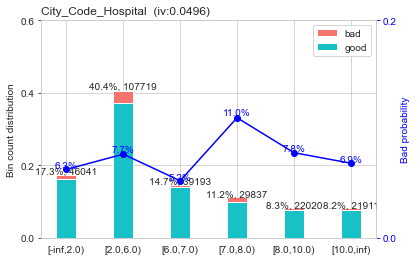

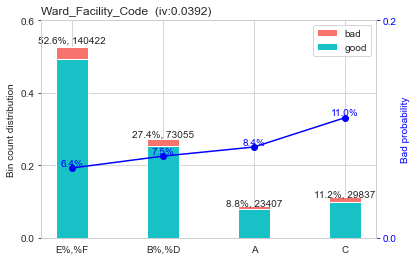

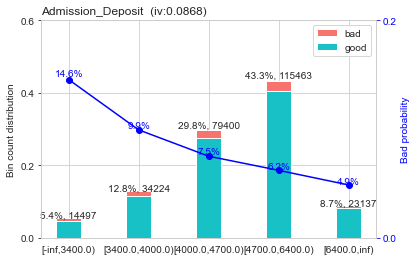

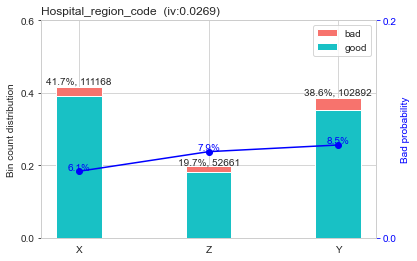

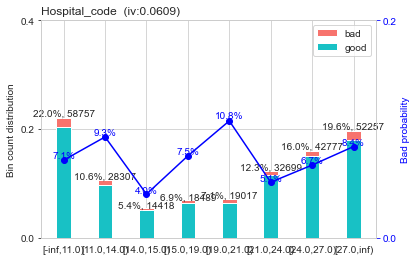

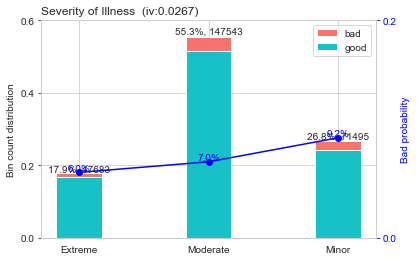

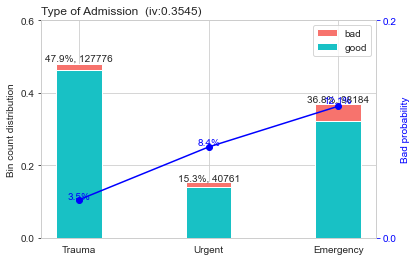

In [134]:
sc.woebin_plot(bins)

In [135]:
bins["Type of Admission"]

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,Type of Admission,Trauma,127776,0.479062,123298,4478,0.035046,-0.789857,0.215348,0.354518,Trauma,False
1,Type of Admission,Urgent,40761,0.152823,37356,3405,0.083536,0.130322,0.002744,0.354518,Urgent,False
2,Type of Admission,Emergency,98184,0.368115,86307,11877,0.120967,0.542264,0.136426,0.354518,Emergency,False


In [136]:
train_woe = sc.woebin_ply(devlopment, bins)
#test_woe = sc.woebin_ply(validation, bins)

[INFO] converting into woe values ...
Woe transformating on 266721 rows and 9 columns in 00:00:17


In [137]:
devlopment.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,159422,13,a,5,Z,2,anesthesia,R,F,4.0,8.0,Trauma,Moderate,2,71-80,5130.0,0
1,286721,26,b,2,Y,3,gynecology,R,D,2.0,15.0,Emergency,Moderate,3,41-50,4679.0,0
2,305382,29,a,4,X,2,gynecology,S,F,4.0,2.0,Urgent,Extreme,2,41-50,5843.0,0
3,90072,6,a,6,X,3,TB & Chest disease,R,F,2.0,1.0,Emergency,Extreme,2,41-50,3645.0,0
4,232866,21,c,3,Z,3,gynecology,S,A,2.0,8.0,Emergency,Moderate,3,51-60,4524.0,0


In [138]:
train_woe.head()

,Department,Available Extra Rooms in Hospital,Ward_Type,Age,Hospital_type_code,Stay,Bed Grade,case_id,Visitors with Patient_woe,City_Code_Patient_woe,City_Code_Hospital_woe,Ward_Facility_Code_woe,Admission_Deposit_woe,Hospital_region_code_woe,Hospital_code_woe,Severity of Illness_woe,Type of Admission_woe
0,anesthesia,2,R,71-80,a,0,4.0,159422,0.342908,-0.104438,0.040785,-0.153128,-0.189810,0.072629,0.245281,-0.062161,-0.789857
1,gynecology,3,R,41-50,b,0,2.0,286721,0.243259,0.174634,0.040785,0.015212,0.014172,0.154060,-0.109661,-0.062161,0.542264
2,gynecology,2,S,41-50,a,0,4.0,305382,0.342908,-0.123644,0.040785,-0.153128,-0.189810,-0.204803,0.135230,-0.223728,0.130322
3,TB & Chest disease,3,R,41-50,a,0,2.0,90072,0.342908,-0.123644,-0.368281,-0.153128,0.320399,-0.204803,-0.039360,-0.223728,0.542264
4,gynecology,3,S,51-60,c,0,2.0,232866,0.243259,-0.104438,0.040785,0.130143,0.014172,0.072629,-0.395267,-0.062161,0.542264


# Bringing everything together

In [139]:
woe_feat_train = [i for i in train_woe.columns if i.endswith('_woe') or i in (['case_id'])]

In [140]:
#woe_feat_dev = [i for i in dev_woe.columns if i.endswith('_woe') or i in (['enrollee_id'])]

In [141]:
train_final = pd.merge(train, train_woe[woe_feat_train], on='case_id', how='left')

In [142]:
train_final

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Severity of Illness,Visitors with Patient,Age,...,age345_trauma,Visitors with Patient_woe,City_Code_Patient_woe,City_Code_Hospital_woe,Ward_Facility_Code_woe,Admission_Deposit_woe,Hospital_region_code_woe,Hospital_code_woe,Severity of Illness_woe,Type of Admission_woe
0,159422,13,5,2,4.0,64466,8.0,1,2,7,...,0,0.342908,-0.104438,0.040785,-0.153128,-0.189810,0.072629,0.245281,-0.062161,-0.789857
1,286721,26,2,3,2.0,19110,15.0,1,3,4,...,0,0.243259,0.174634,0.040785,0.015212,0.014172,0.154060,-0.109661,-0.062161,0.542264
2,305382,29,4,2,4.0,101531,2.0,2,2,4,...,0,0.342908,-0.123644,0.040785,-0.153128,-0.189810,-0.204803,0.135230,-0.223728,0.130322
3,90072,6,6,3,2.0,85470,1.0,2,2,4,...,0,0.342908,-0.123644,-0.368281,-0.153128,0.320399,-0.204803,-0.039360,-0.223728,0.542264
4,232866,21,3,3,2.0,45229,8.0,1,3,5,...,0,0.243259,-0.104438,0.040785,0.130143,0.014172,0.072629,-0.395267,-0.062161,0.542264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266716,50829,11,2,2,4.0,97610,8.0,2,4,5,...,0,-0.467943,-0.104438,0.040785,0.015212,-0.189810,0.154060,0.245281,-0.223728,0.542264
266717,151915,32,9,1,1.0,129120,7.0,2,4,8,...,0,-0.467943,-0.104438,0.059794,0.015212,0.320399,0.154060,0.135230,-0.223728,-0.789857
266718,261401,26,2,4,3.0,85261,7.0,0,4,2,...,0,-0.467943,-0.104438,0.040785,0.015212,-0.189810,0.154060,-0.109661,0.235690,0.542264
266719,114834,24,1,4,2.0,44445,1.0,2,2,4,...,0,0.342908,-0.123644,-0.176034,-0.153128,0.320399,-0.204803,-0.109661,-0.223728,0.130322


In [143]:
from sklearn.model_selection import train_test_split
train_40, train_60=train_test_split(train_final, test_size=0.6, random_state=25, stratify=train_final['Stay'])
train_40

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Severity of Illness,Visitors with Patient,Age,...,age345_trauma,Visitors with Patient_woe,City_Code_Patient_woe,City_Code_Hospital_woe,Ward_Facility_Code_woe,Admission_Deposit_woe,Hospital_region_code_woe,Hospital_code_woe,Severity of Illness_woe,Type of Admission_woe
72358,288173,9,5,3,4.0,55018,4.0,0,2,3,...,0,0.342908,0.191401,0.040785,-0.153128,-0.189810,0.072629,-0.039360,0.235690,0.130322
162702,174878,26,2,2,2.0,38052,2.0,1,2,3,...,1,0.342908,-0.123644,0.040785,0.015212,-0.448234,0.154060,-0.109661,-0.062161,-0.789857
60183,186792,22,9,3,2.0,32391,4.0,0,2,3,...,0,0.342908,0.191401,0.059794,0.015212,0.014172,0.154060,-0.395267,0.235690,0.130322
106880,127341,27,7,4,3.0,93207,2.0,2,2,3,...,0,0.342908,-0.123644,0.439249,0.439249,-0.448234,0.154060,0.135230,-0.223728,0.542264
131710,113662,26,2,2,2.0,96618,13.0,2,2,7,...,0,0.342908,0.174634,0.040785,0.015212,0.014172,0.154060,-0.109661,-0.223728,-0.789857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201823,68941,27,7,3,2.0,94296,8.0,1,4,7,...,0,-0.467943,-0.104438,0.439249,0.439249,-0.189810,0.154060,0.135230,-0.062161,-0.789857
24039,183465,11,2,4,3.0,9866,8.0,0,3,1,...,0,0.243259,-0.104438,0.040785,0.015212,-0.448234,0.154060,0.245281,0.235690,-0.789857
89220,285310,12,9,4,3.0,20749,7.0,0,4,7,...,0,-0.467943,-0.104438,0.059794,0.015212,-0.189810,0.154060,0.245281,0.235690,-0.789857
161296,241196,6,6,2,4.0,76965,2.0,0,4,2,...,0,-0.467943,-0.123644,-0.368281,-0.153128,-0.189810,-0.204803,-0.039360,0.235690,-0.789857


In [144]:
x_train=train_40.drop("Stay", axis=1)
y_train=train_40["Stay"]
y_train
x_train

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Severity of Illness,Visitors with Patient,Age,...,age345_trauma,Visitors with Patient_woe,City_Code_Patient_woe,City_Code_Hospital_woe,Ward_Facility_Code_woe,Admission_Deposit_woe,Hospital_region_code_woe,Hospital_code_woe,Severity of Illness_woe,Type of Admission_woe
72358,288173,9,5,3,4.0,55018,4.0,0,2,3,...,0,0.342908,0.191401,0.040785,-0.153128,-0.189810,0.072629,-0.039360,0.235690,0.130322
162702,174878,26,2,2,2.0,38052,2.0,1,2,3,...,1,0.342908,-0.123644,0.040785,0.015212,-0.448234,0.154060,-0.109661,-0.062161,-0.789857
60183,186792,22,9,3,2.0,32391,4.0,0,2,3,...,0,0.342908,0.191401,0.059794,0.015212,0.014172,0.154060,-0.395267,0.235690,0.130322
106880,127341,27,7,4,3.0,93207,2.0,2,2,3,...,0,0.342908,-0.123644,0.439249,0.439249,-0.448234,0.154060,0.135230,-0.223728,0.542264
131710,113662,26,2,2,2.0,96618,13.0,2,2,7,...,0,0.342908,0.174634,0.040785,0.015212,0.014172,0.154060,-0.109661,-0.223728,-0.789857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201823,68941,27,7,3,2.0,94296,8.0,1,4,7,...,0,-0.467943,-0.104438,0.439249,0.439249,-0.189810,0.154060,0.135230,-0.062161,-0.789857
24039,183465,11,2,4,3.0,9866,8.0,0,3,1,...,0,0.243259,-0.104438,0.040785,0.015212,-0.448234,0.154060,0.245281,0.235690,-0.789857
89220,285310,12,9,4,3.0,20749,7.0,0,4,7,...,0,-0.467943,-0.104438,0.059794,0.015212,-0.189810,0.154060,0.245281,0.235690,-0.789857
161296,241196,6,6,2,4.0,76965,2.0,0,4,2,...,0,-0.467943,-0.123644,-0.368281,-0.153128,-0.189810,-0.204803,-0.039360,0.235690,-0.789857


In [145]:
x_train=x_train.drop(["case_id","patientid"], axis=1)
x_train

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,City_Code_Patient,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Hospital_type_code_a,...,age345_trauma,Visitors with Patient_woe,City_Code_Patient_woe,City_Code_Hospital_woe,Ward_Facility_Code_woe,Admission_Deposit_woe,Hospital_region_code_woe,Hospital_code_woe,Severity of Illness_woe,Type of Admission_woe
72358,9,5,3,4.0,4.0,0,2,3,0.542573,0,...,0,0.342908,0.191401,0.040785,-0.153128,-0.189810,0.072629,-0.039360,0.235690,0.130322
162702,26,2,2,2.0,2.0,1,2,3,1.780126,0,...,1,0.342908,-0.123644,0.040785,0.015212,-0.448234,0.154060,-0.109661,-0.062161,-0.789857
60183,22,9,3,2.0,4.0,0,2,3,-0.606650,0,...,0,0.342908,0.191401,0.059794,0.015212,0.014172,0.154060,-0.395267,0.235690,0.130322
106880,27,7,4,3.0,2.0,2,2,3,2.567744,1,...,0,0.342908,-0.123644,0.439249,0.439249,-0.448234,0.154060,0.135230,-0.223728,0.542264
131710,26,2,2,2.0,13.0,2,2,7,-0.485195,0,...,0,0.342908,0.174634,0.040785,0.015212,0.014172,0.154060,-0.109661,-0.223728,-0.789857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201823,27,7,3,2.0,8.0,1,4,7,0.718314,1,...,0,-0.467943,-0.104438,0.439249,0.439249,-0.189810,0.154060,0.135230,-0.062161,-0.789857
24039,11,2,4,3.0,8.0,0,3,1,3.229306,0,...,0,0.243259,-0.104438,0.040785,0.015212,-0.448234,0.154060,0.245281,0.235690,-0.789857
89220,12,9,4,3.0,7.0,0,4,7,-0.061943,1,...,0,-0.467943,-0.104438,0.059794,0.015212,-0.189810,0.154060,0.245281,0.235690,-0.789857
161296,6,6,2,4.0,2.0,0,4,2,0.006146,1,...,0,-0.467943,-0.123644,-0.368281,-0.153128,-0.189810,-0.204803,-0.039360,0.235690,-0.789857


In [146]:
(X,y)=(x_train, y_train)

In [149]:
l=list(x_train)
l

['Hospital_code',
 'City_Code_Hospital',
 'Available Extra Rooms in Hospital',
 'Bed Grade',
 'City_Code_Patient',
 'Severity of Illness',
 'Visitors with Patient',
 'Age',
 'Admission_Deposit',
 'Hospital_type_code_a',
 'Hospital_type_code_b',
 'Hospital_type_code_c',
 'Hospital_type_code_d',
 'Hospital_type_code_e',
 'Hospital_type_code_f',
 'Hospital_type_code_g',
 'Hospital_region_code_X',
 'Hospital_region_code_Y',
 'Hospital_region_code_Z',
 'Department_TB & Chest disease',
 'Department_anesthesia',
 'Department_gynecology',
 'Department_radiotherapy',
 'Department_surgery',
 'Ward_Type_P',
 'Ward_Type_Q',
 'Ward_Type_R',
 'Ward_Type_S',
 'Ward_Type_T',
 'Ward_Type_U',
 'Ward_Facility_Code_A',
 'Ward_Facility_Code_B',
 'Ward_Facility_Code_C',
 'Ward_Facility_Code_D',
 'Ward_Facility_Code_E',
 'Ward_Facility_Code_F',
 'Type of Admission_Emergency',
 'Type of Admission_Trauma',
 'Type of Admission_Urgent',
 'hosp_26',
 'hosptype_a',
 'cityhosp126',
 'cityhosp7',
 'cityhosp159',
 'h

# Feature selection

## Random Forest (feature selection)

Feature: 0, Score: 0.02368
Feature: 1, Score: 0.00550
Feature: 2, Score: 0.06202
Feature: 3, Score: 0.05043
Feature: 4, Score: 0.06255
Feature: 5, Score: 0.03105
Feature: 6, Score: 0.01753
Feature: 7, Score: 0.08947
Feature: 8, Score: 0.21469
Feature: 9, Score: 0.00207
Feature: 10, Score: 0.00131
Feature: 11, Score: 0.00139
Feature: 12, Score: 0.00142
Feature: 13, Score: 0.00113
Feature: 14, Score: 0.00066
Feature: 15, Score: 0.00038
Feature: 16, Score: 0.00075
Feature: 17, Score: 0.00105
Feature: 18, Score: 0.00108
Feature: 19, Score: 0.00474
Feature: 20, Score: 0.00561
Feature: 21, Score: 0.00471
Feature: 22, Score: 0.00681
Feature: 23, Score: 0.00070
Feature: 24, Score: 0.00182
Feature: 25, Score: 0.01448
Feature: 26, Score: 0.01199
Feature: 27, Score: 0.01262
Feature: 28, Score: 0.00060
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00112
Feature: 31, Score: 0.00111
Feature: 32, Score: 0.00082
Feature: 33, Score: 0.00089
Feature: 34, Score: 0.00103
Feature: 35, Score: 0.00197
Fe

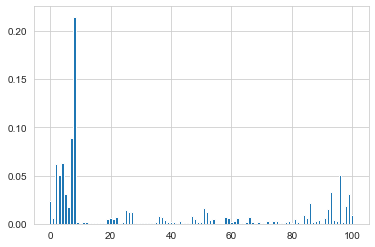

In [147]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset

# define the model
model_rf = RandomForestClassifier()
# fit the model
model_rf.fit(X, y)
# get importance
importance = model_rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [151]:
df=pd.DataFrame()
df['Features']=list(x_train)
df['Importance']=list(importance)
features_rf=df.sort_values(by='Importance', ascending=False)
features_rf['Cumulative_Score'] = features_rf.Importance.cumsum()
features_rf

,Features,Importance,Cumulative_Score
8,Admission_Deposit,0.214693,0.214693
7,Age,0.089467,0.304160
4,City_Code_Patient,0.062547,0.366707
2,Available Extra Rooms in Hospital,0.062019,0.428726
3,Bed Grade,0.050426,0.479152
...,...,...,...
68,wardfacil_A_hosptype_c,0.000000,1.000000
55,illness_mod,0.000000,1.000000
57,illness_min,0.000000,1.000000
56,illness_ext,0.000000,1.000000


In [157]:
features_rf.to_csv("Features_RF.csv")

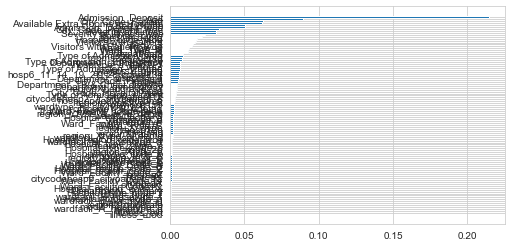

In [160]:
f_i = list(zip(x_train,model_rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

# Cat Boost

In [152]:
import numpy as np
from catboost import CatBoostClassifier, Pool

In [153]:
# define the model
model_cat = CatBoostClassifier(iterations=100)
# fit the model
model_cat.fit(X, y)
# get importance
importance = model_cat.feature_importances_

Learning rate set to 0.5
0:	learn: 0.3221222	total: 191ms	remaining: 18.9s
1:	learn: 0.2445776	total: 225ms	remaining: 11s
2:	learn: 0.2280353	total: 255ms	remaining: 8.25s
3:	learn: 0.2231380	total: 285ms	remaining: 6.84s
4:	learn: 0.2210851	total: 315ms	remaining: 5.98s
5:	learn: 0.2196496	total: 343ms	remaining: 5.38s
6:	learn: 0.2185139	total: 386ms	remaining: 5.12s
7:	learn: 0.2177721	total: 423ms	remaining: 4.86s
8:	learn: 0.2157804	total: 452ms	remaining: 4.57s
9:	learn: 0.2151338	total: 495ms	remaining: 4.46s
10:	learn: 0.2145420	total: 525ms	remaining: 4.25s
11:	learn: 0.2140896	total: 552ms	remaining: 4.05s
12:	learn: 0.2135289	total: 579ms	remaining: 3.88s
13:	learn: 0.2131570	total: 606ms	remaining: 3.72s
14:	learn: 0.2125349	total: 648ms	remaining: 3.67s
15:	learn: 0.2117548	total: 679ms	remaining: 3.56s
16:	learn: 0.2112551	total: 711ms	remaining: 3.47s
17:	learn: 0.2110895	total: 737ms	remaining: 3.36s
18:	learn: 0.2107947	total: 764ms	remaining: 3.26s
19:	learn: 0.21026

Feature: 0, Score: 2.22249
Feature: 1, Score: 0.78622
Feature: 2, Score: 3.85699
Feature: 3, Score: 1.12877
Feature: 4, Score: 1.75183
Feature: 5, Score: 0.48454
Feature: 6, Score: 4.31274
Feature: 7, Score: 1.36024
Feature: 8, Score: 4.64940
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.05793
Feature: 11, Score: 0.34262
Feature: 12, Score: 0.04872
Feature: 13, Score: 0.31877
Feature: 14, Score: 0.01889
Feature: 15, Score: 0.11665
Feature: 16, Score: 0.01271
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.08441
Feature: 19, Score: 0.16576
Feature: 20, Score: 0.34581
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.19082
Feature: 23, Score: 0.15925
Feature: 24, Score: 1.72717
Feature: 25, Score: 0.85972
Feature: 26, Score: 7.01429
Feature: 27, Score: 8.31837
Feature: 28, Score: 0.05864
Feature: 29, Score: 0.00423
Feature: 30, Score: 0.03986
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.05894
Feature: 33, Score: 0.06828
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.15026
Fe

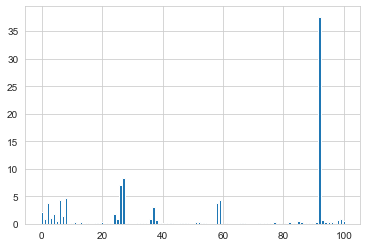

In [154]:
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [156]:
df_cat=pd.DataFrame()
df_cat['Features']=list(x_train)
df_cat['Importance']=list(importance/100)
features_cat=df_cat.sort_values(by='Importance', ascending=False)
features_cat['Cumulative_Score'] = features_cat.Importance.cumsum()
features_cat

,Features,Importance,Cumulative_Score
92,Visitors with Patient_woe,0.376164,0.376164
27,Ward_Type_S,0.083184,0.459348
26,Ward_Type_R,0.070143,0.529491
8,Admission_Deposit,0.046494,0.575985
59,visitors3_4,0.043889,0.619874
...,...,...,...
80,regionXfacil_F,0.000000,1.000000
68,wardfacil_A_hosptype_c,0.000000,1.000000
34,Ward_Facility_Code_E,0.000000,1.000000
69,wardfacil_BF_hosptype_d,0.000000,1.000000


In [158]:
features_cat.to_csv('Features_Cat.csv')

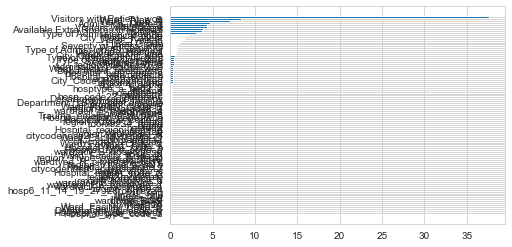

In [161]:
f_i = list(zip(x_train,model_cat.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()